<a href="https://colab.research.google.com/github/MehrnazFarahmand/Internship/blob/main/rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: R

In [7]:
data.nunique().to_frame('No of unique values')

,No of unique values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


In [8]:
data['Date'] = pd.to_datetime(data['Date'], format ='%Y-%m-%d')
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)
data['Year']=data['Date'].apply(lambda x:x.year)
data.drop('Date',axis=1, inplace=True)

In [9]:
data.isna().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Month               0
Day                 0
Year                0
dtype: int64

Since the data us is ordered by date and region, instead of mean, it might be best to backfill or front fill the nulls

In [10]:
null_cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']

for col in null_cols:
  data[col].bfill(inplace=True)

In [11]:
data.isna().sum()

Location          0
MinTemp           0
MaxTemp           1
Rainfall          0
Evaporation      39
Sunshine         39
WindGustDir       1
WindGustSpeed     1
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      1
Month             0
Day               0
Year              0
dtype: int64

In [12]:
null_cols = ['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','RainTomorrow']
for col in null_cols:
  data[col].ffill(inplace=True)

In [13]:
data.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Day              0
Year             0
dtype: int64

In [14]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
0,Albury,13.4,22.9,0.6,8.6,9.0,W,44.0,W,WNW,...,1007.1,8.0,2.0,16.9,21.8,No,No,12,1,2008
1,Albury,7.4,25.1,0.0,8.6,9.0,WNW,44.0,NNW,WSW,...,1007.8,7.0,2.0,17.2,24.3,No,No,12,2,2008
2,Albury,12.9,25.7,0.0,8.6,9.0,WSW,46.0,W,WSW,...,1008.7,7.0,2.0,21.0,23.2,No,No,12,3,2008
3,Albury,9.2,28.0,0.0,8.6,9.0,NE,24.0,SE,E,...,1012.8,7.0,8.0,18.1,26.5,No,No,12,4,2008
4,Albury,17.5,32.3,1.0,8.6,9.0,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,5.6,8.6,E,31.0,SE,ENE,...,1020.3,3.0,2.0,10.1,22.4,No,No,6,21,2017
8421,Uluru,3.6,25.3,0.0,5.6,8.6,NNW,22.0,SE,N,...,1019.1,3.0,2.0,10.9,24.5,No,No,6,22,2017
8422,Uluru,5.4,26.9,0.0,5.6,8.6,N,37.0,SE,WNW,...,1016.8,3.0,2.0,12.5,26.1,No,No,6,23,2017
8423,Uluru,7.8,27.0,0.0,5.6,8.6,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,6,24,2017


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = le.fit_transform(data[col])

In [17]:
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.00000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193329,23.874386,3.322944,7.153555,8.87378,7.721662,37.655193,7.656499,7.795490,...,1015.420356,4.480593,4.282849,17.770255,22.450493,0.256617,0.257092,6.442136,15.741958,2012.102433
std,3.162654,5.398520,6.139857,11.865187,10.644472,3.27113,4.497233,16.163866,4.529317,4.482193,...,6.233833,2.951272,2.849813,5.621854,5.960242,0.436792,0.437056,3.437994,8.787354,2.473137
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.00000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,3.000000,9.200000,19.300000,0.000000,3.800000,8.10000,4.000000,26.000000,3.000000,4.000000,...,1011.400000,1.000000,1.000000,13.800000,18.100000,0.000000,0.000000,3.000000,8.000000,2010.000000
50%,6.000000,13.300000,23.300000,0.000000,6.400000,9.20000,8.000000,37.000000,7.000000,8.000000,...,1016.400000,5.000000,5.000000,17.800000,21.900000,0.000000,0.000000,6.000000,16.000000,2011.000000
75%,8.000000,17.400000,28.100000,1.200000,8.000000,11.10000,12.000000,48.000000,12.000000,11.000000,...,1018.900000,7.000000,7.000000,22.000000,26.400000,1.000000,1.000000,9.000000,23.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.90000,15.000000,107.000000,15.000000,15.000000,...,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,12.000000,31.000000,2017.000000


<Axes: >

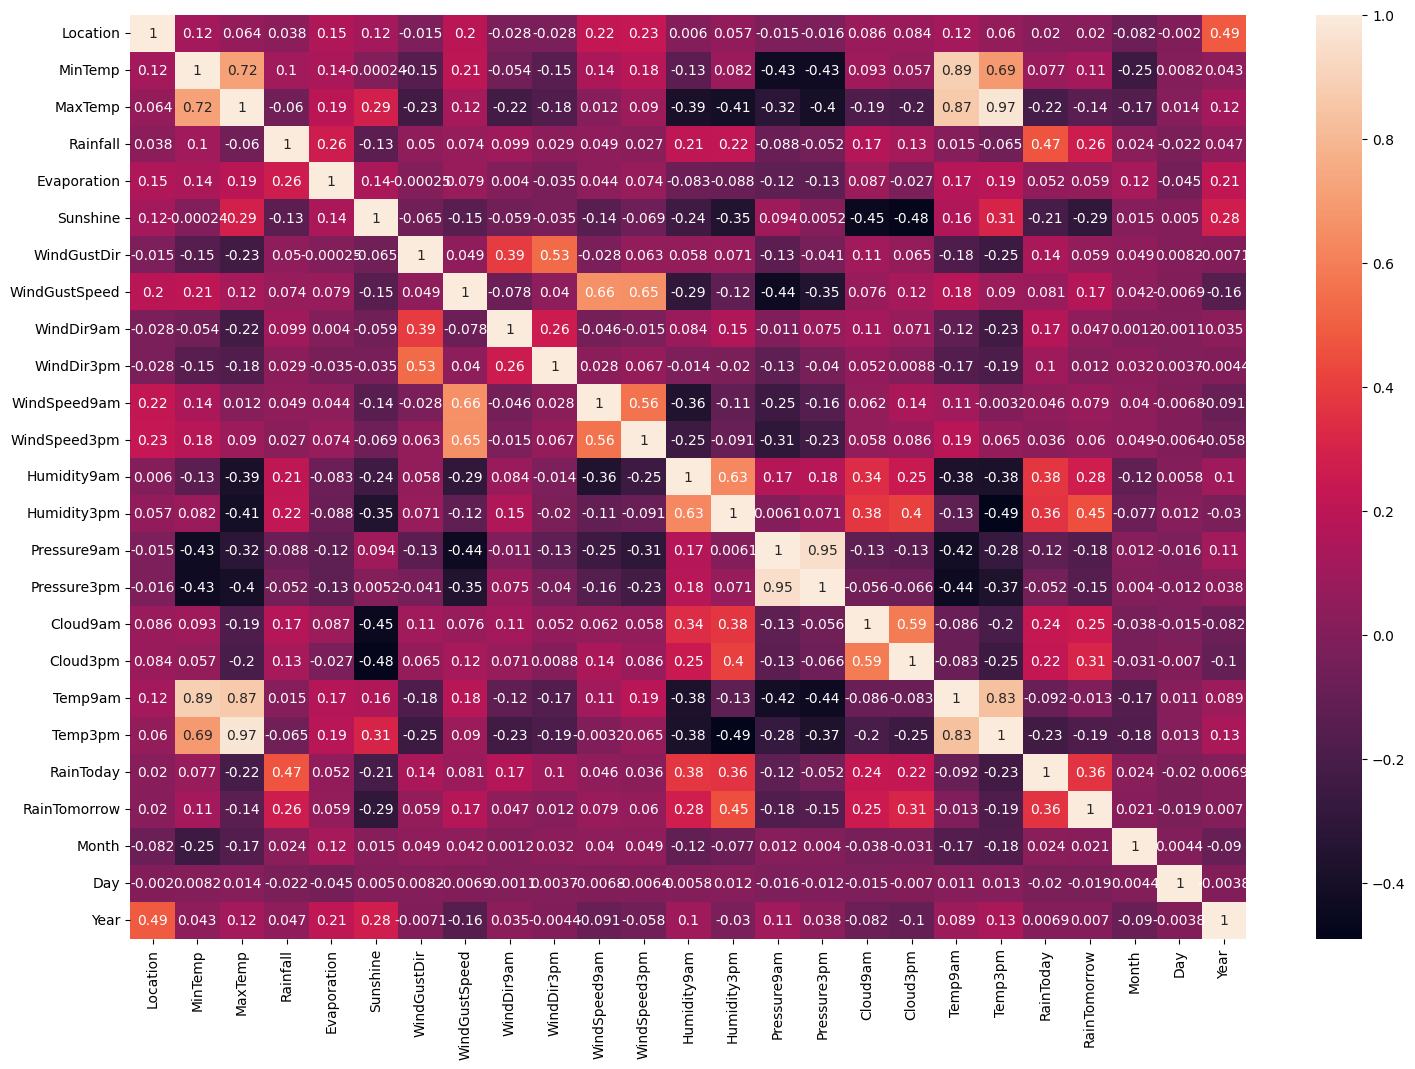

In [18]:
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), annot=True)

There seem to be a lot of multicolinearity between some features that have 9am and 3pm calculations. instead of losing one of the columns we could try and merge them into one columns by taking a mean

In [19]:
data['AVGTemp'] = data[['MaxTemp', 'MinTemp','Temp9am','Temp3pm']].mean(axis=1)
data['AVGwindDir'] = data[['WindDir9am', 'WindDir3pm']].mean(axis=1)
data['AVGwindSpeed'] = data[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1)
data['AVGhumidity'] = data[['Humidity9am', 'Humidity3pm']].mean(axis=1)
data['AVGpressure'] = data[['Pressure9am', 'Pressure3pm']].mean(axis=1)
data['AVGcloud'] = data[['Cloud9am', 'Cloud3pm']].mean(axis=1)

In [20]:
data.drop(['MinTemp','MaxTemp','Temp9am','Temp3pm','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm'], axis=1, inplace=True)

In [21]:
data.shape

(8425, 17)

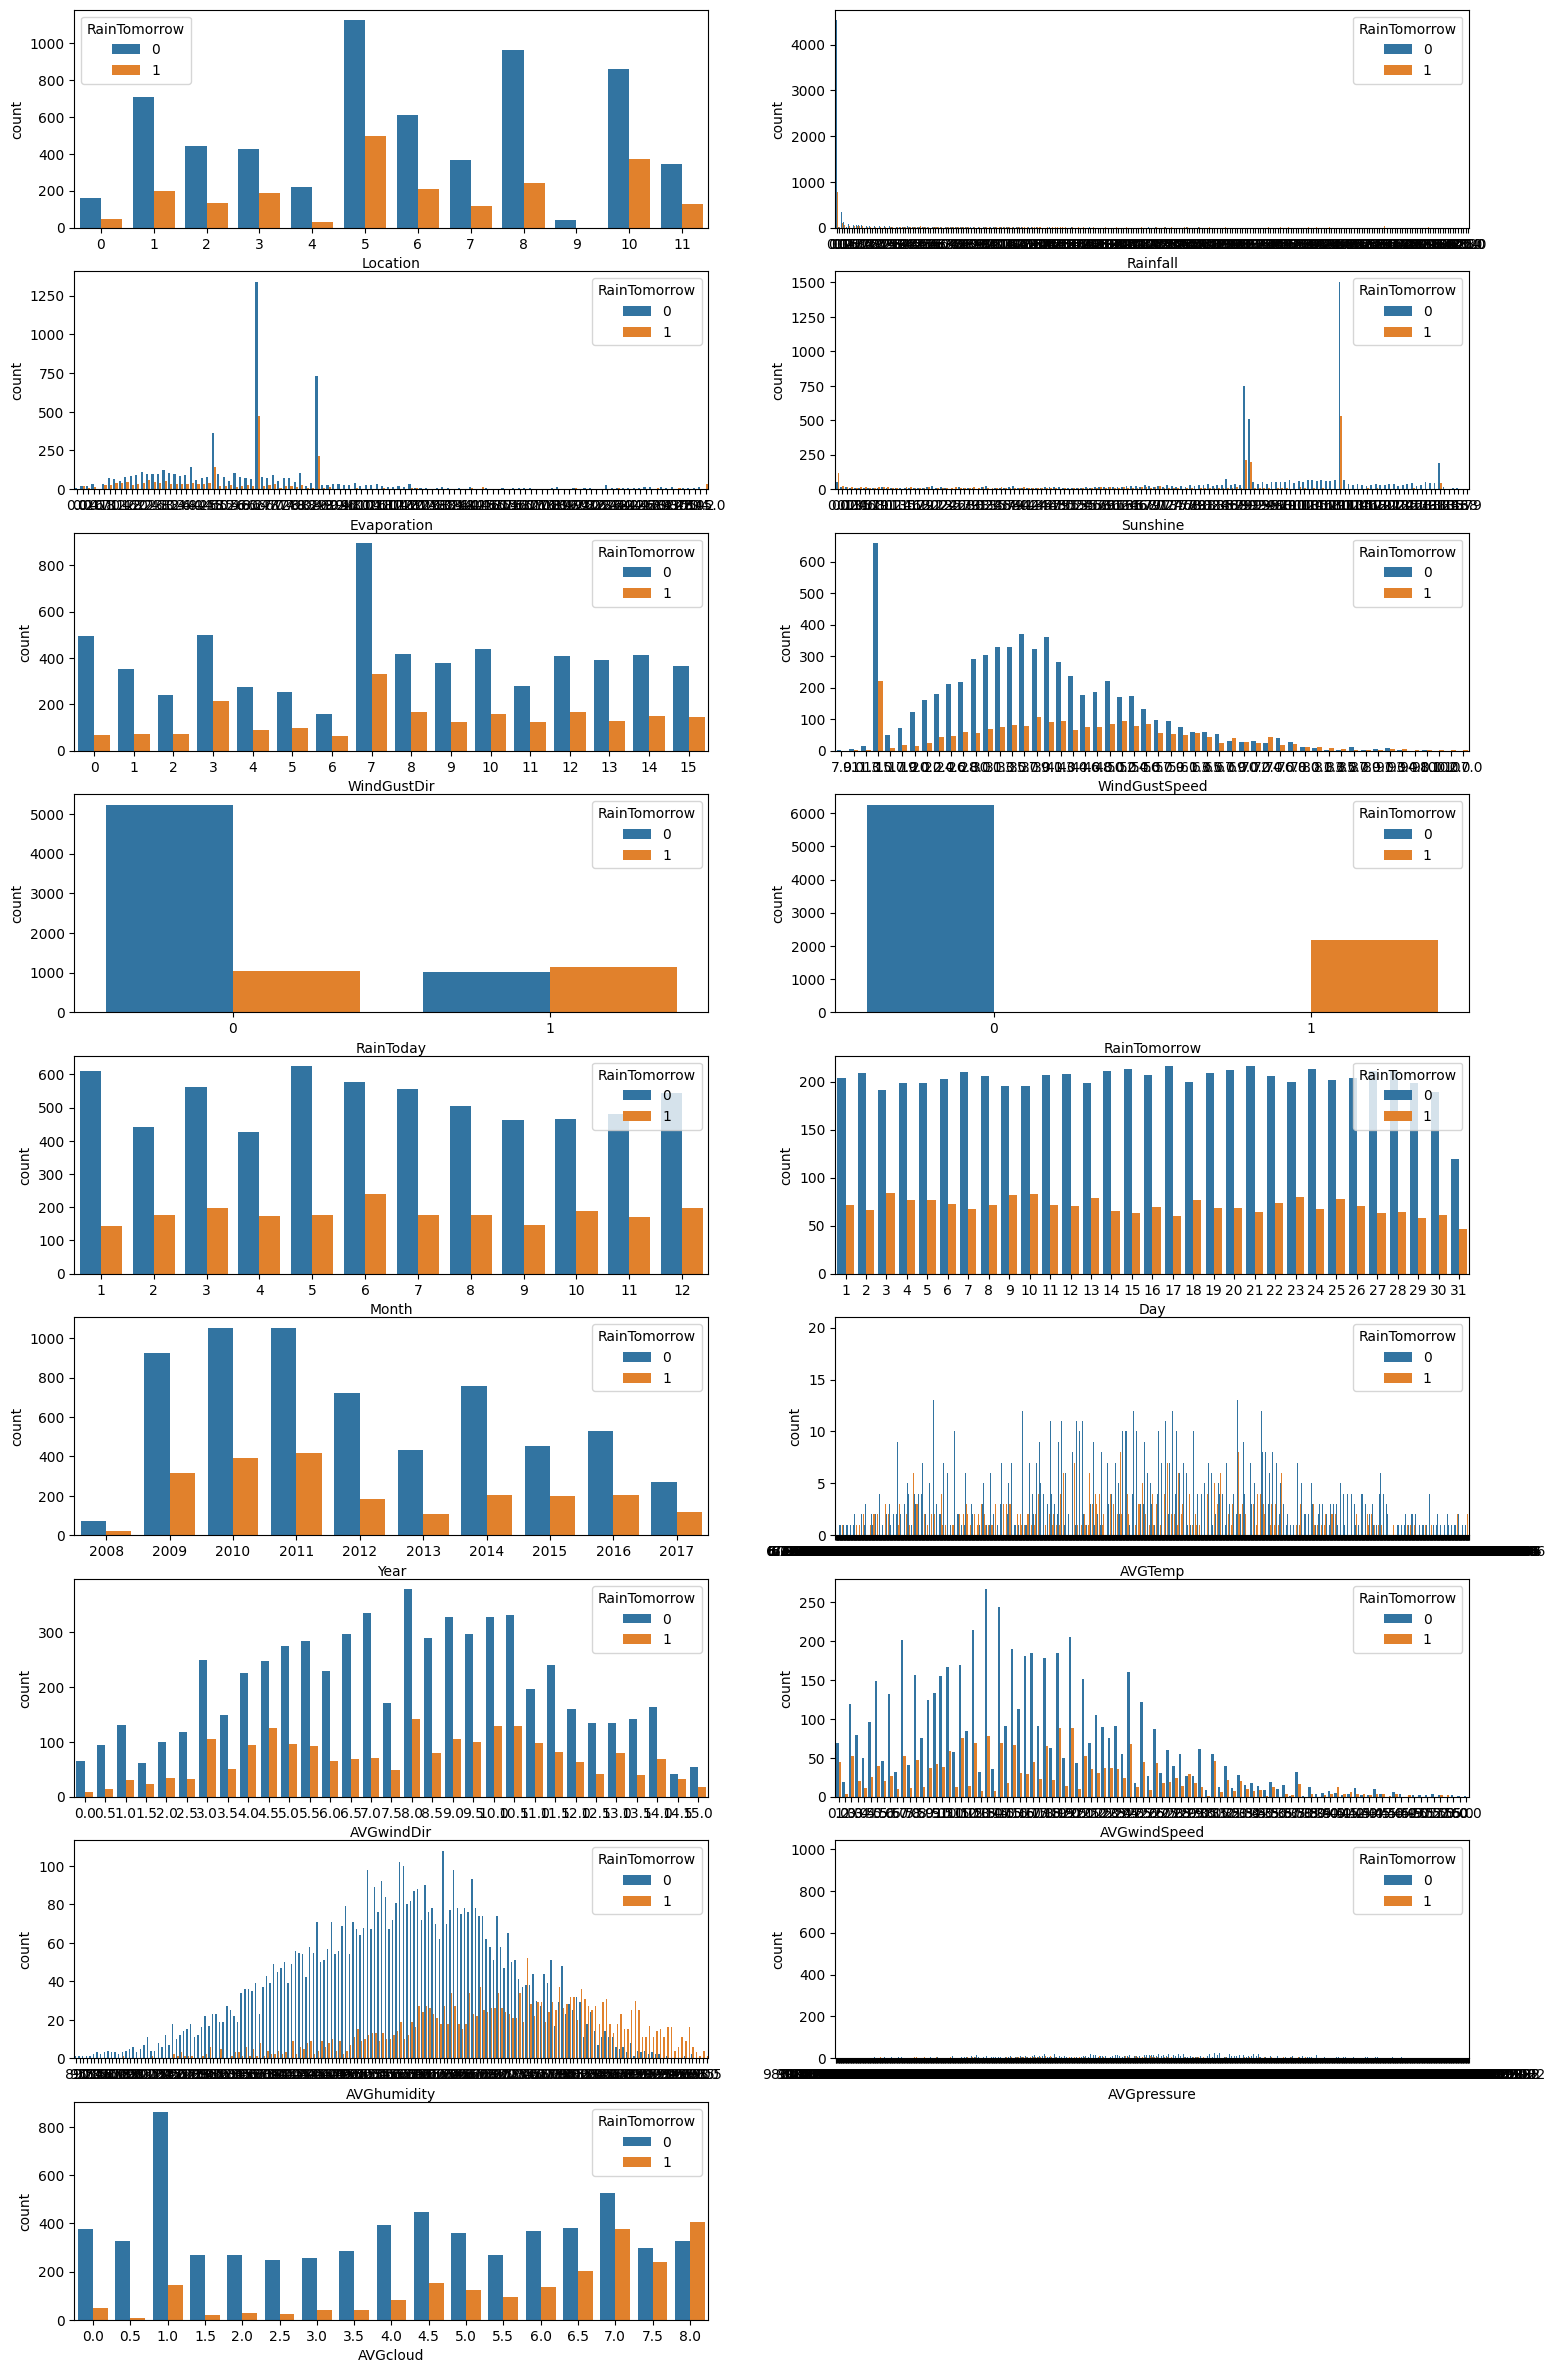

In [22]:
plt.figure(figsize = (18,30))
plotnumber = 1
for col in data.columns:
    if plotnumber<=17:
        ax = plt.subplot(9,2,plotnumber)
        sns.countplot(x = data[col], hue=data['RainTomorrow'])
        plt.xlabel(col)
        plotnumber +=1

In [66]:
data.describe()

,Location,Rainfall,Sunshine,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Month,Day,AVGTemp,AVGwindDir,AVGwindSpeed,AVGhumidity,AVGpressure,AVGcloud
count,8425.000000,8425.000000,8425.00000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,3.322944,8.87378,7.721662,37.655193,0.256617,0.257092,6.442136,15.741958,19.322116,7.725994,16.133472,59.565994,1016.822516,4.381721
std,3.162654,11.865187,3.27113,4.497233,16.163866,0.436792,0.437056,3.437994,8.787354,5.401515,3.574630,8.838017,15.904855,6.252171,2.583756
min,0.000000,0.000000,0.00000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,4.175000,0.000000,0.000000,8.500000,986.350000,0.000000
25%,3.000000,0.000000,8.10000,4.000000,26.000000,0.000000,0.000000,3.000000,8.000000,15.250000,5.000000,9.500000,49.000000,1012.700000,2.000000
50%,6.000000,0.000000,9.20000,8.000000,37.000000,0.000000,0.000000,6.000000,16.000000,19.075000,8.000000,15.500000,60.000000,1018.100000,4.500000
75%,8.000000,1.200000,11.10000,12.000000,48.000000,1.000000,1.000000,9.000000,23.000000,23.350000,10.500000,21.500000,70.500000,1020.050000,7.000000
max,11.000000,371.000000,13.90000,15.000000,107.000000,1.000000,1.000000,12.000000,31.000000,36.400000,15.000000,60.000000,98.500000,1037.300000,8.000000


<Axes: >

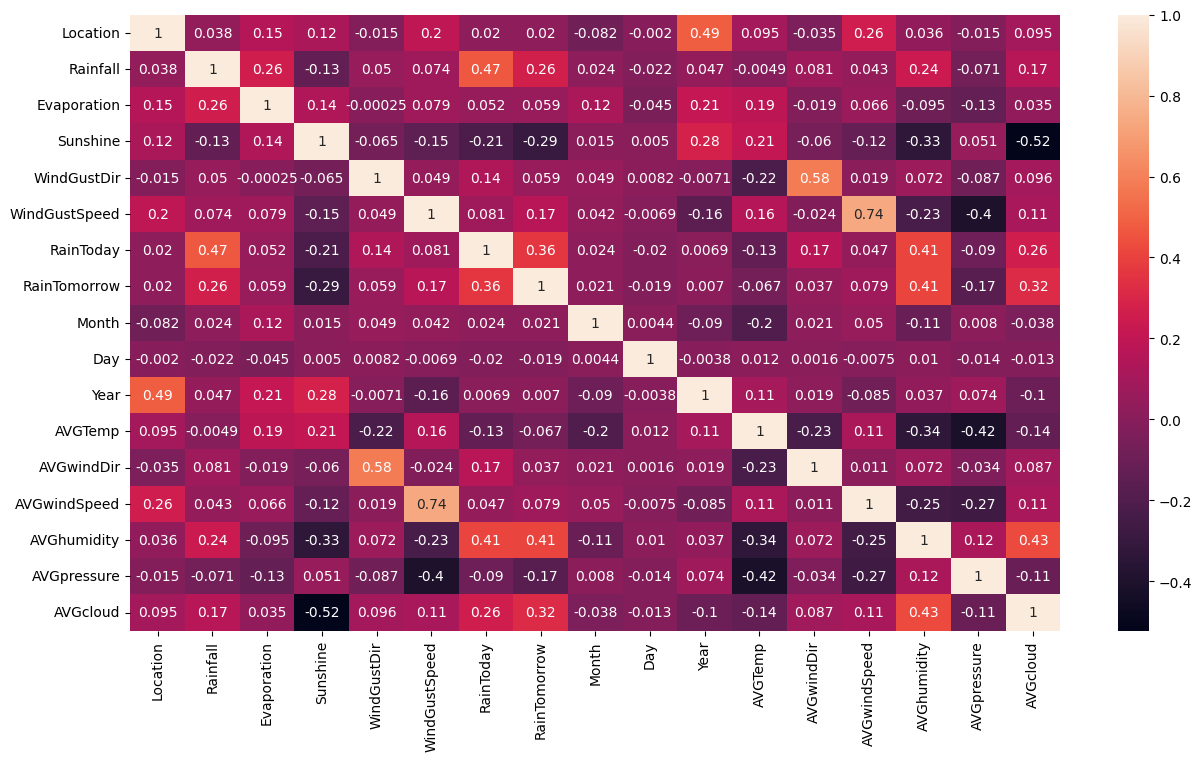

In [23]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True)

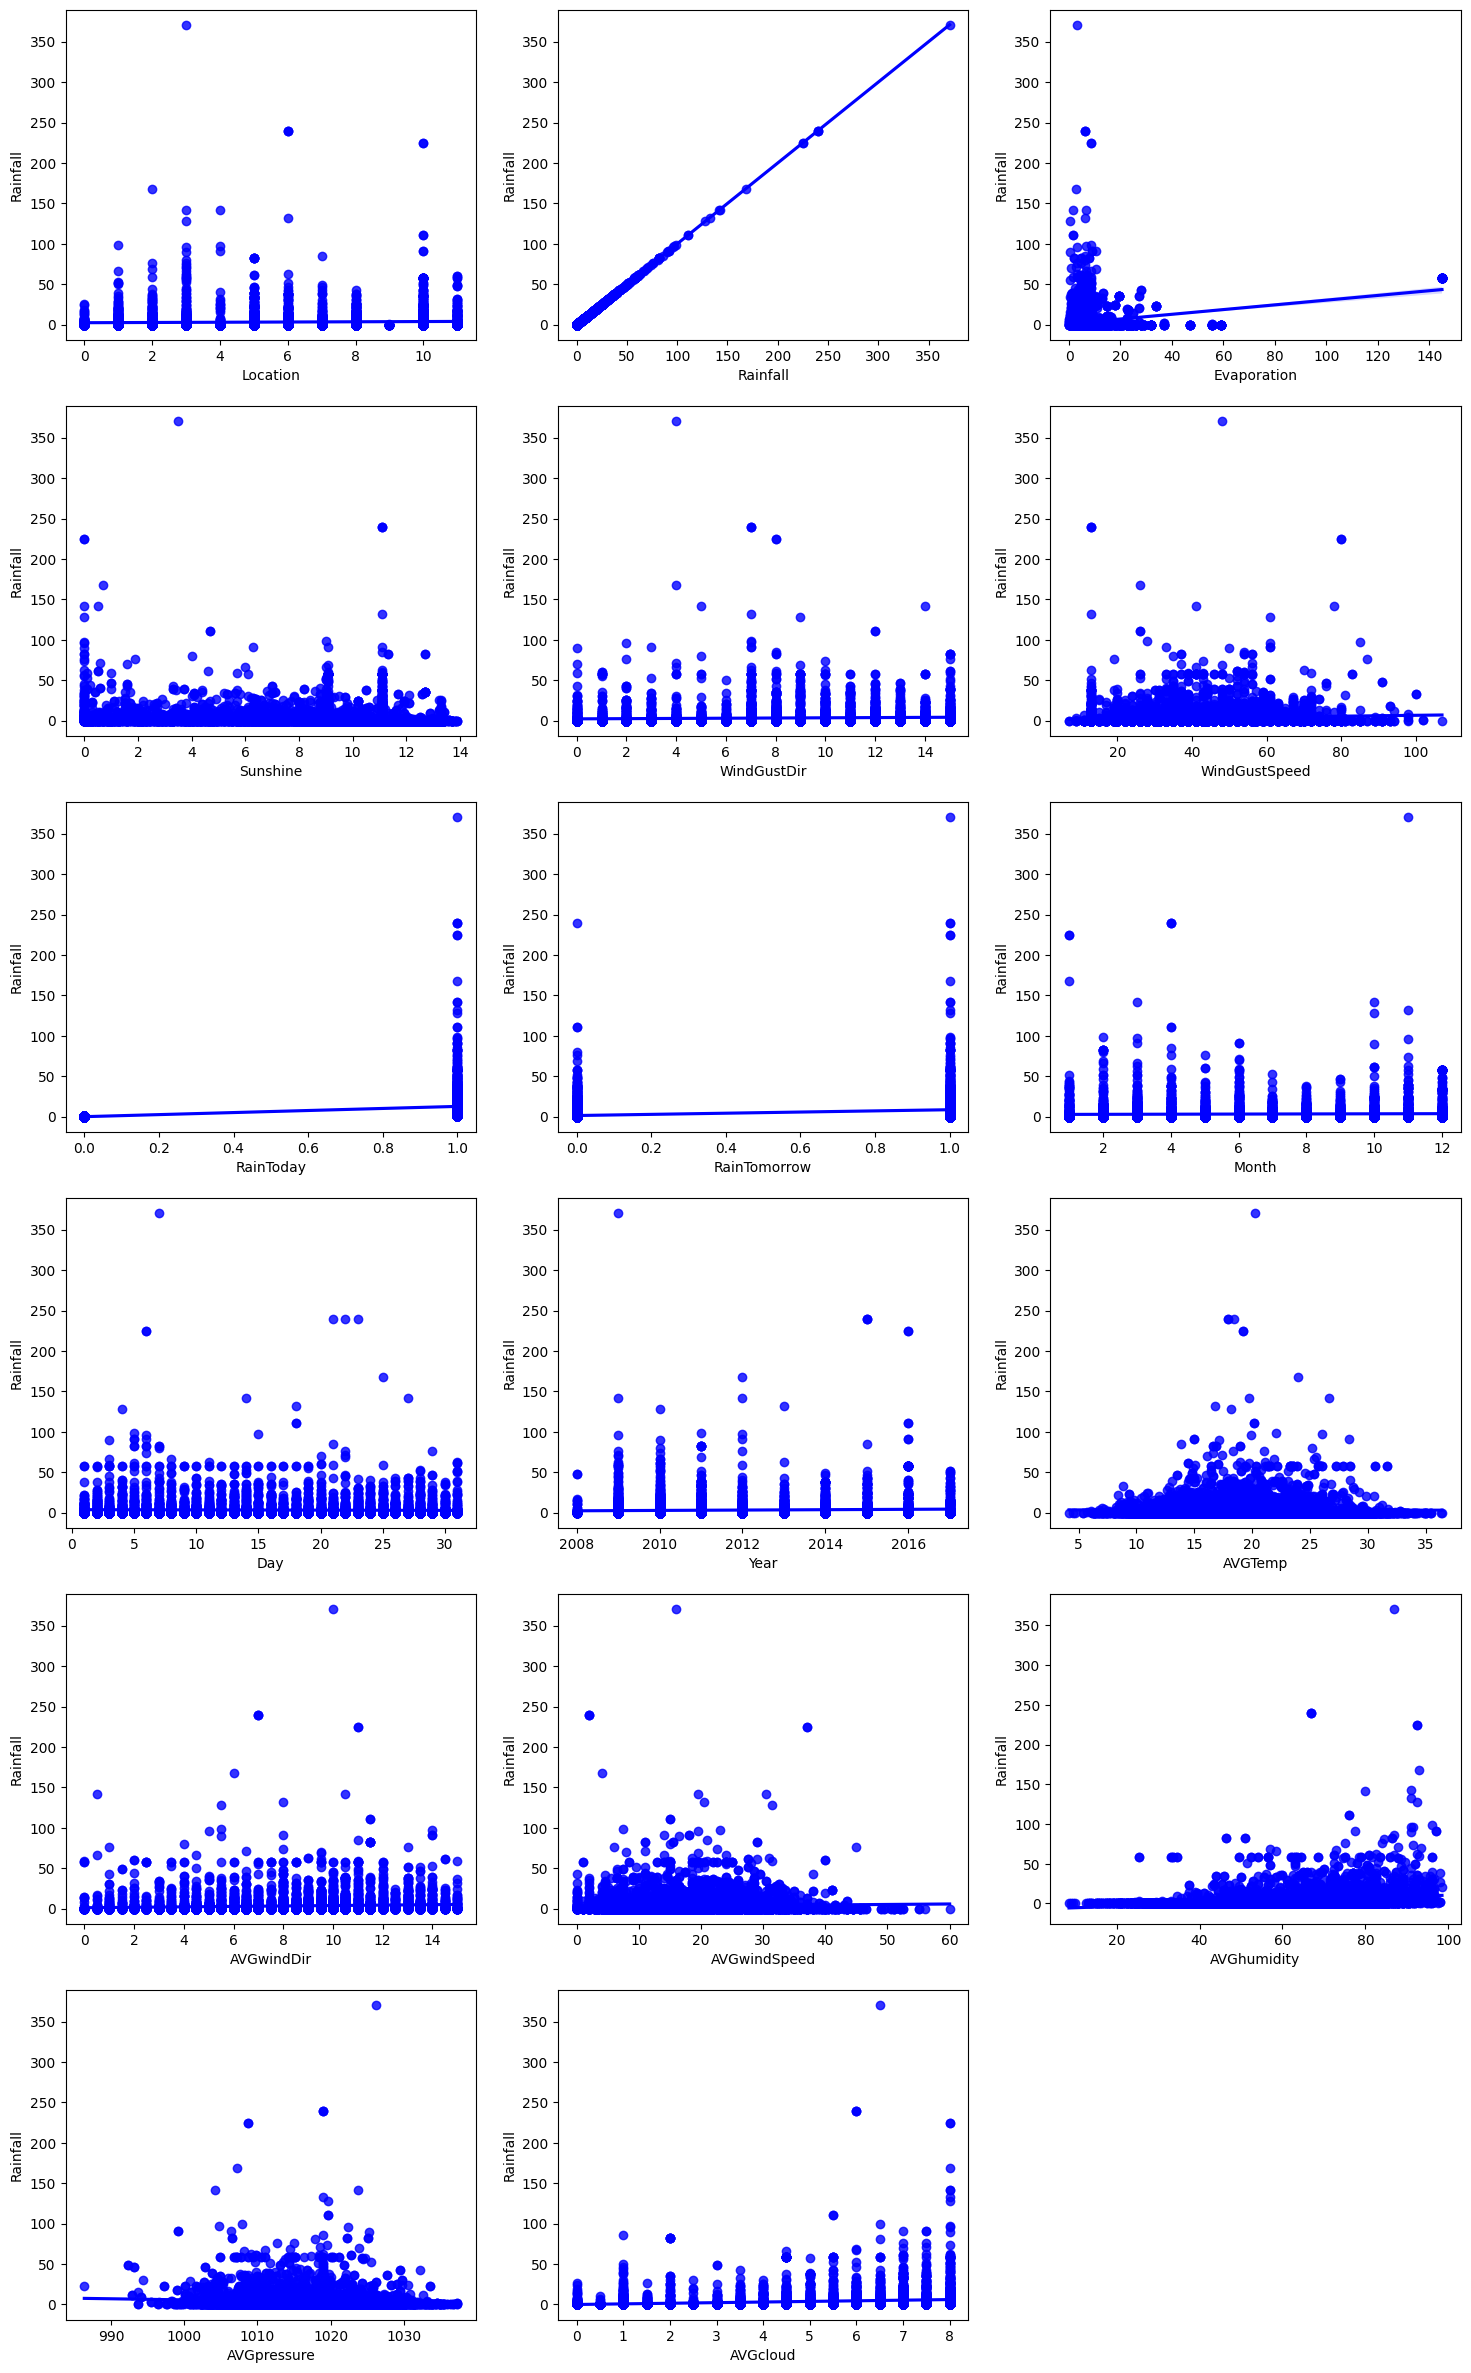

In [24]:
plt.figure(figsize = (18,30))
plotnumber = 1
for col in data.columns:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.regplot(x = col , y = 'Rainfall' , data=data, color='b')
        plt.xlabel(col)
        plt.ylabel('Rainfall')
        plotnumber +=1

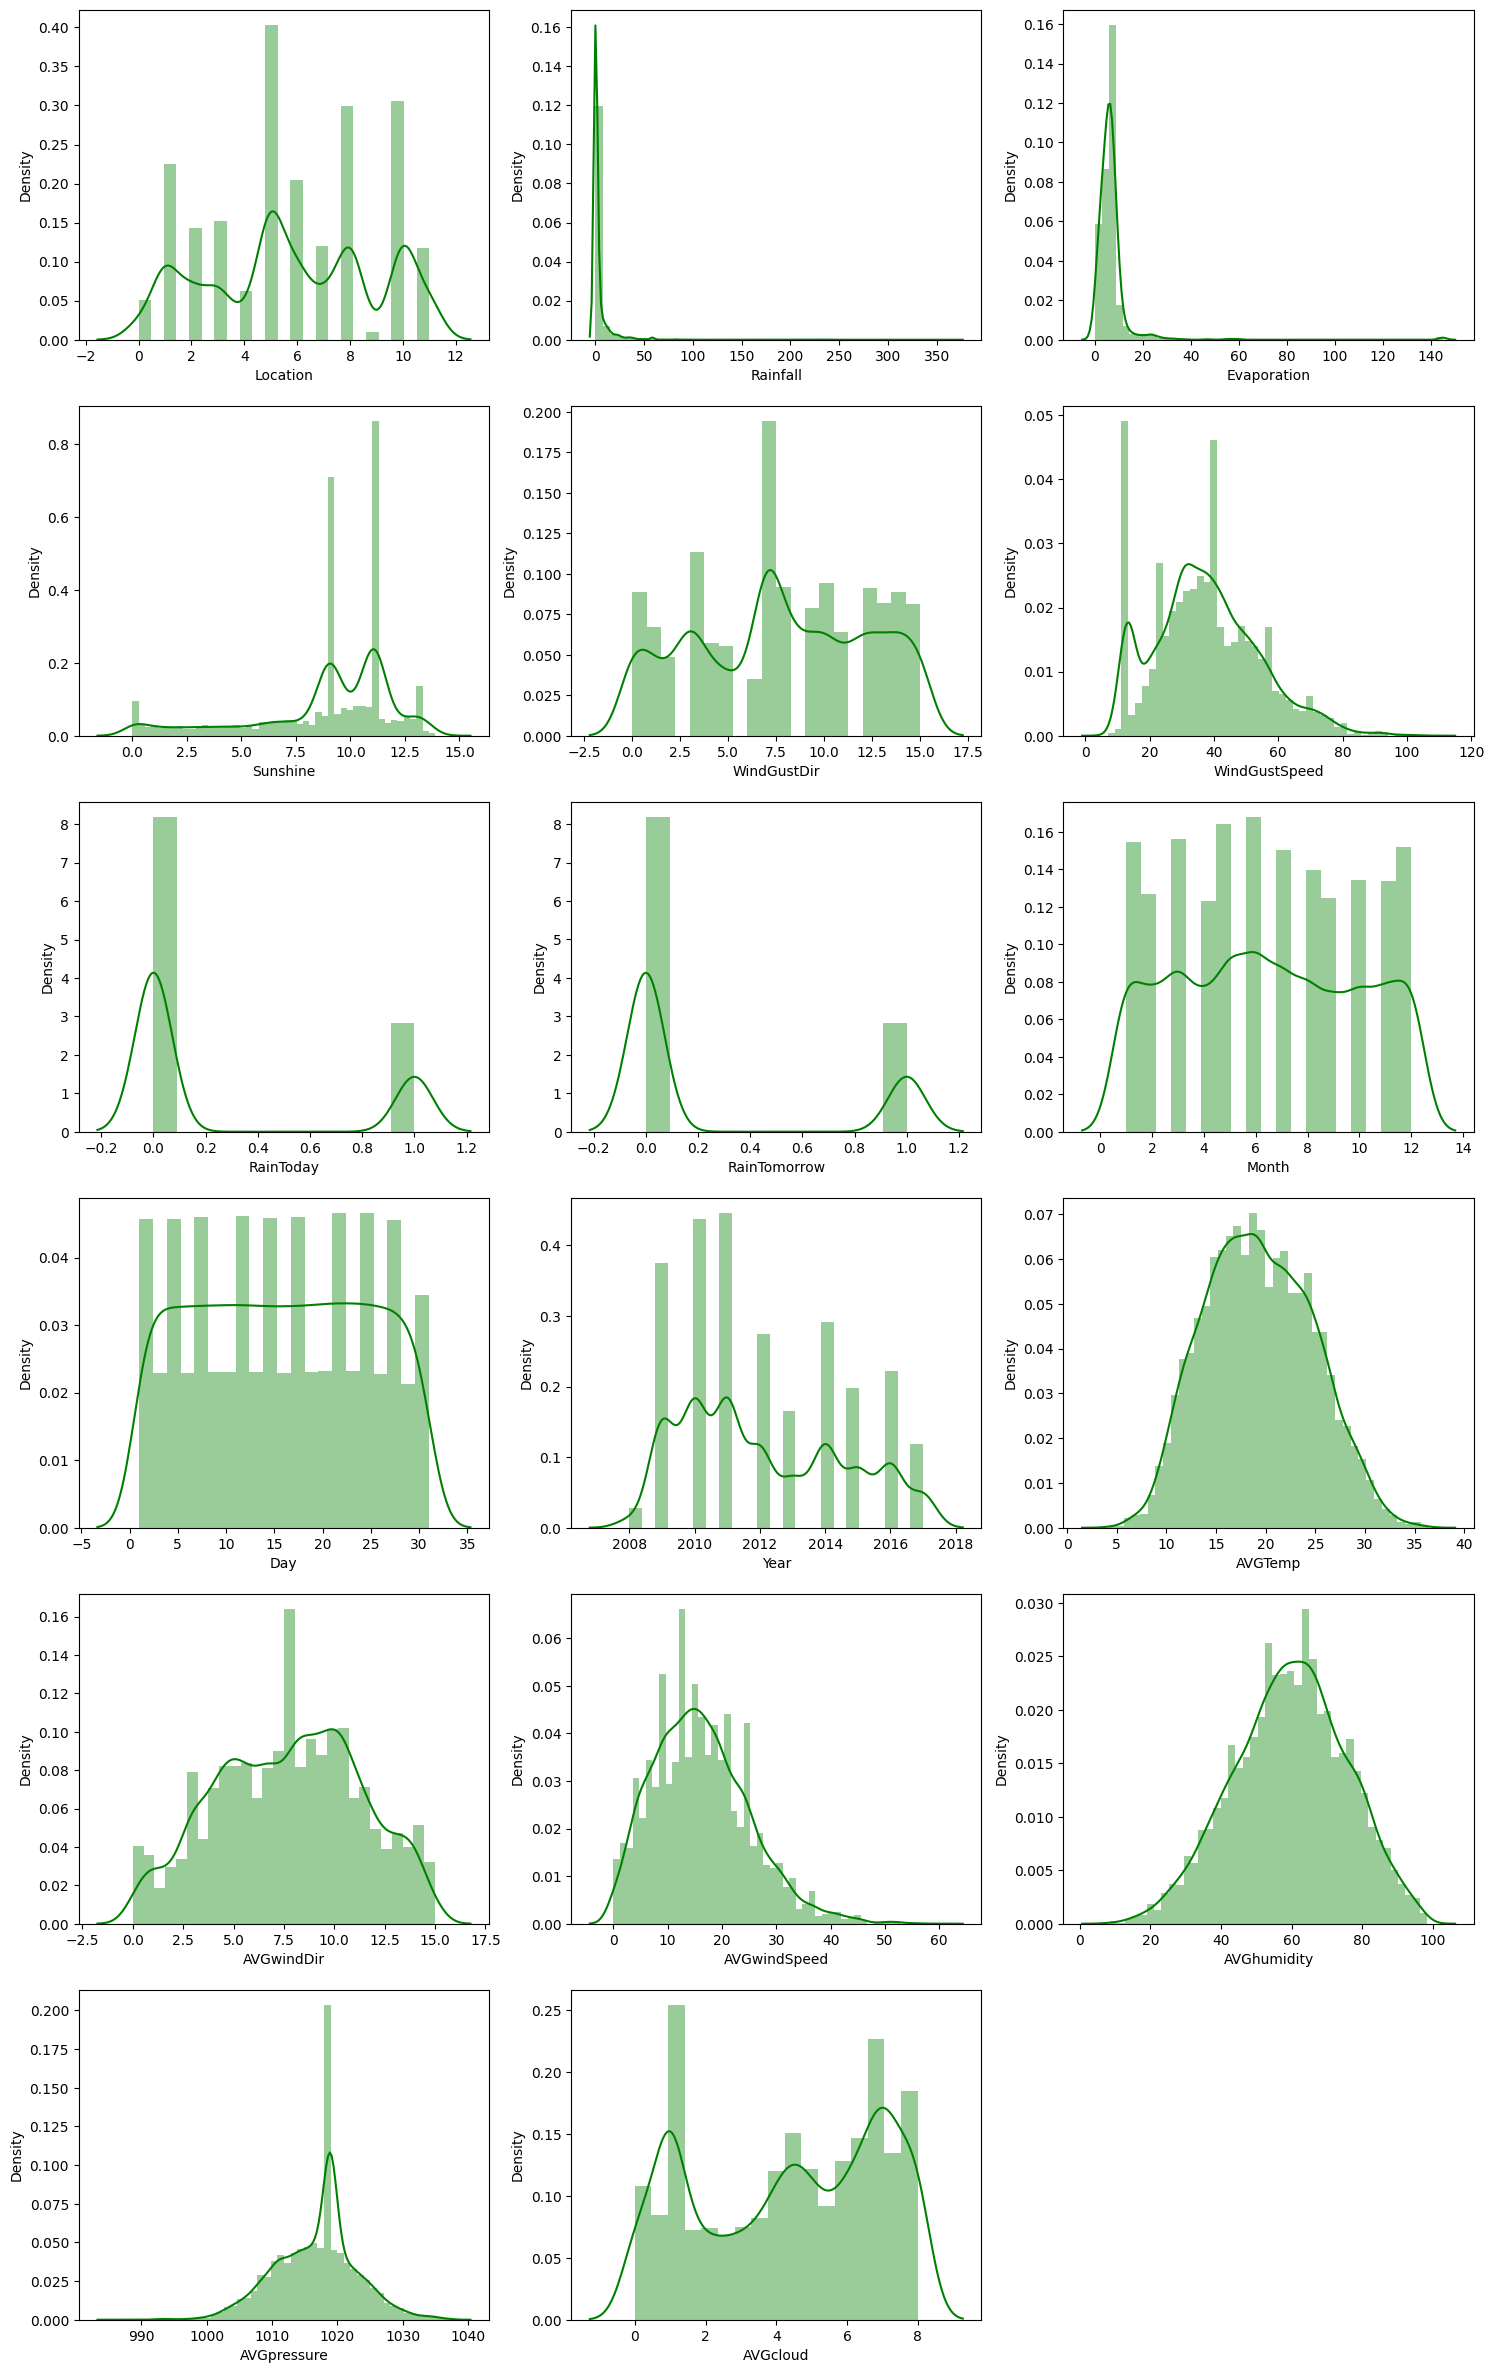

In [25]:
plt.figure(figsize = (18,30))
plotnumber = 1
for col in data.columns:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[col], color='g')
        plt.xlabel(col)
        plotnumber +=1

In [26]:
data.skew()

Location         -0.050456
Rainfall         11.105533
Evaporation      10.302798
Sunshine         -1.223477
WindGustDir      -0.089944
WindGustSpeed     0.506454
RainToday         1.114674
RainTomorrow      1.111827
Month             0.039388
Day               0.004260
Year              0.418663
AVGTemp           0.140762
AVGwindDir       -0.080747
AVGwindSpeed      0.633080
AVGhumidity      -0.149318
AVGpressure      -0.169332
AVGcloud         -0.226681
dtype: float64

* although the years seem to have a pattern going in terms of rain but it  doesn't seem to have a strong correlation with our targets so we can drop it
* Evaporation and Rainfall are skewed,it might be best to drop evaporation given the skewness coupled with the fact that it had almost 50% null values that we manually filled in.

In [27]:
data.drop(['Year','Evaporation'], axis =1 , inplace=True)

Since data is ordered by date and location it's best to give it a shuffle

In [28]:
data = data.sample(frac=1).reset_index(drop=True)

<Axes: xlabel='Rainfall'>

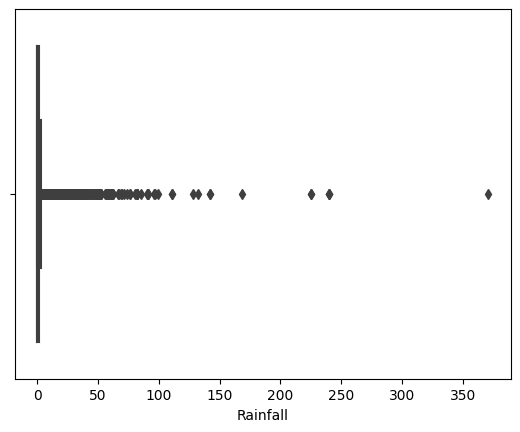

In [67]:
sns.boxplot(x=data['Rainfall'])

A few of the outliers seem to be unreasonable. It's understandable that most locations have rainfall close to zero but some of the others are way too high and can't be correct so it's best to remove these too high numbers

In [68]:
q1 = data['Rainfall'].quantile(0.25)
q3 = data['Rainfall'].quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

upper_array = np.where(data['Rainfall'] >= upper)[0]
data.drop(index=upper_array, inplace=True)

<Axes: xlabel='Rainfall'>

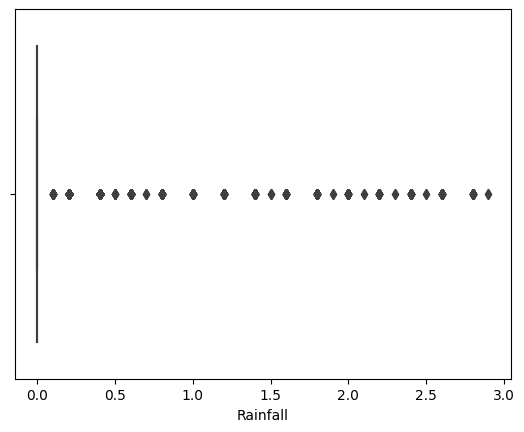

In [69]:
sns.boxplot(x=data['Rainfall'])

<Axes: xlabel='Rainfall', ylabel='Density'>

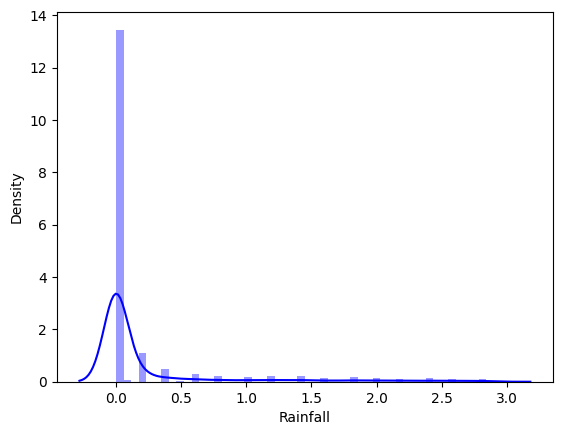

In [70]:
sns.distplot(data['Rainfall'], color='b')

In [71]:
x1 = data.drop('RainTomorrow', axis=1)
y1 = data['RainTomorrow']
x2 = data.drop('Rainfall', axis=1)
y2 = data['Rainfall']

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

x1_scaled = pd.DataFrame(scaler.fit_transform(x1), columns= x1.columns)
x2_scaled = pd.DataFrame(scaler.fit_transform(x2), columns= x2.columns)

In [74]:
y1.value_counts()

0    5586
1    1228
Name: RainTomorrow, dtype: int64

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
sm = SMOTE()
x1, y1 = sm.fit_resample(x1_scaled,y1)

In [77]:
y1.value_counts()

1    5586
0    5586
Name: RainTomorrow, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
  x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = accuracy_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Accuracy:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Accuracy: 0.7413484486873508 
 Best Random State: 150


In [80]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=MaxRS)

In [81]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

**Random Forest**

In [82]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFCpred = RFC.predict(x_test)
print(accuracy_score(y_test,RFCpred))
print(confusion_matrix(y_test,RFCpred))
print(classification_report(y_test,RFCpred))

0.9421241050119332
[[1585   90]
 [ 104 1573]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1675
           1       0.95      0.94      0.94      1677

    accuracy                           0.94      3352
   macro avg       0.94      0.94      0.94      3352
weighted avg       0.94      0.94      0.94      3352



**Logistic Regression**

In [83]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
print(accuracy_score(y_test,LRpred))
print(confusion_matrix(y_test,LRpred))
print(classification_report(y_test,LRpred))

0.7413484486873508
[[1265  410]
 [ 457 1220]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1675
           1       0.75      0.73      0.74      1677

    accuracy                           0.74      3352
   macro avg       0.74      0.74      0.74      3352
weighted avg       0.74      0.74      0.74      3352



**Support Vector**

In [84]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.8302505966587113
[[1376  299]
 [ 270 1407]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1675
           1       0.82      0.84      0.83      1677

    accuracy                           0.83      3352
   macro avg       0.83      0.83      0.83      3352
weighted avg       0.83      0.83      0.83      3352



**Gradient Boosting**

In [85]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBCpred = GBC.predict(x_test)
print(accuracy_score(y_test,GBCpred))
print(confusion_matrix(y_test,GBCpred))
print(classification_report(y_test,GBCpred))

0.8624701670644391
[[1474  201]
 [ 260 1417]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1675
           1       0.88      0.84      0.86      1677

    accuracy                           0.86      3352
   macro avg       0.86      0.86      0.86      3352
weighted avg       0.86      0.86      0.86      3352



**Bagging**

In [86]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
BCpred = BC.predict(x_test)
print(accuracy_score(y_test,BCpred))
print(confusion_matrix(y_test,BCpred))
print(classification_report(y_test,BCpred))

0.9179594272076372
[[1568  107]
 [ 168 1509]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1675
           1       0.93      0.90      0.92      1677

    accuracy                           0.92      3352
   macro avg       0.92      0.92      0.92      3352
weighted avg       0.92      0.92      0.92      3352



**Cross Validation**

In [87]:
score = cross_val_score(RFC, x1,y1)
print(score)
print(score.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,RFCpred)-score.mean())

[0.90201342 0.95346756 0.96060877 0.95971352 0.94628469]
0.9444175934660393
Difference Between score mean and accuracy score: -0.0022934884541060407


In [88]:
score1 = cross_val_score(LR, x1,y1)
print(score1)
print(score1.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,LRpred)-score1.mean())

[0.71722595 0.72841163 0.73679499 0.72918532 0.70411817]
0.7231472123917733
Difference Between score mean and accuracy score: 0.018201236295577572


In [89]:
score2 = cross_val_score(svc, x1,y1)
print(score2)
print(score2.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,svcpred)-score2.mean())

[0.80089485 0.82416107 0.83527305 0.81781558 0.81647269]
0.8189234506778502
Difference Between score mean and accuracy score: 0.011327145980861042


In [90]:
score3 = cross_val_score(GBC, x1,y1)
print(score3)
print(score3.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,GBCpred)-score3.mean())

[0.71991051 0.86711409 0.88675022 0.87958818 0.88003581]
0.8466797650305729
Difference Between score mean and accuracy score: 0.01579040203386628


In [91]:
score4 = cross_val_score(BC, x1,y1)
print(score4)
print(score4.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,BCpred)-score4.mean())

[0.85727069 0.92751678 0.94628469 0.93822739 0.92479857]
0.9188196251144104
Difference Between score mean and accuracy score: -0.0008601979067731635


Random Forest and Bagging Classifier seem to be performing best

In [50]:
from sklearn import metrics

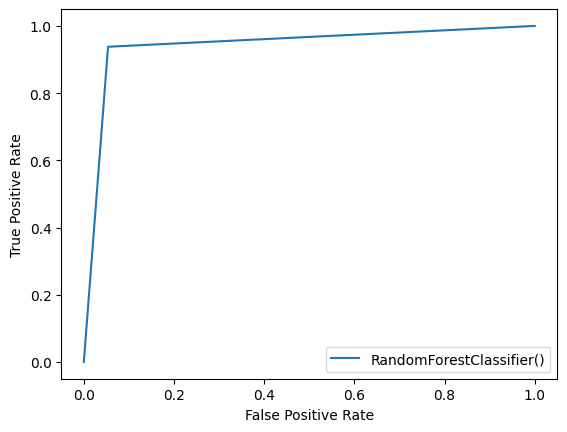

In [92]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,RFCpred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = RFC)
rfcurve.plot()

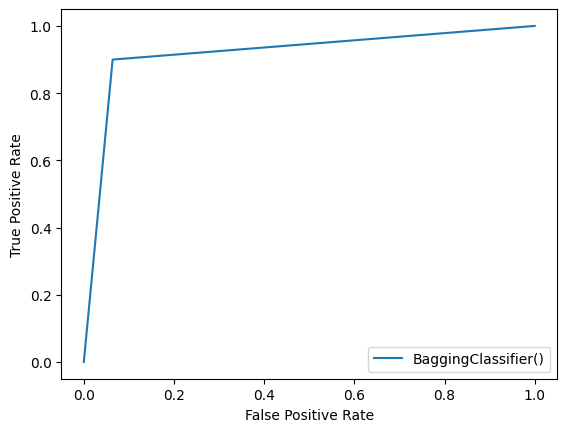

In [93]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,BCpred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = BC)
rfcurve.plot()

Random Forest is slightly better

In [53]:
from sklearn.model_selection import GridSearchCV

**Hyperparameter Tuning**

In [94]:
param = {'criterion':['gini', 'entropy', 'log_loss'],'max_features':['sqrt', 'log2', 'None'],'max_depth': [1, 3, 10, 50,100]}
gscv = GridSearchCV(RFC,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 10, 50, 100],
                         'max_features': ['sqrt', 'log2', 'None']})

In [95]:
gscv.best_params_

{'criterion': 'log_loss', 'max_depth': 100, 'max_features': 'log2'}

In [97]:
model1 = RandomForestClassifier(criterion= 'log_loss', max_depth= 100, max_features= 'log2')
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9418257756563246
[[1587   88]
 [ 107 1570]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1675
           1       0.95      0.94      0.94      1677

    accuracy                           0.94      3352
   macro avg       0.94      0.94      0.94      3352
weighted avg       0.94      0.94      0.94      3352



In [98]:
import joblib

In [99]:
joblib.dump(model1,'rain_tomorrow.pk1')

['rain_tomorrow.pk1']

In [100]:
df1 = pd.DataFrame()
actual = np.array(y_test)
df1['Actual'] = actual
df1['Prediction'] = pred
df1

,Actual,Prediction
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
3347,1,1
3348,1,1
3349,0,0
3350,0,0


# Predicting amount of Rainfall

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN

In [115]:
MaxAccu = 0
MaxRS = 0
for i in range(1,400):
  x_train,x_test,y_train,y_test = train_test_split(x2_scaled,y2,test_size=0.30,random_state=i)
  LR = LinearRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = r2_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Score:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Score: 0.8578532720169458 
 Best Random State: 233


In [116]:
x_train,x_test,y_train,y_test = train_test_split(x2_scaled,y2,test_size=0.30,random_state=MaxRS)

**Linear Regression**

In [117]:
LR = LinearRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
LR_trainpred = LR.predict(x_train)
print('R2_score:', r2_score(y_test,LRpred))
print('R2_score for training data:', r2_score(y_train,LR_trainpred))
print('MAE:', mean_absolute_error(y_test, LRpred))
print('MSE:', mean_squared_error(y_test, LRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, LRpred)))

R2_score: 0.8578532720169458
R2_score for training data: 0.8255834148447421
MAE: 0.12338992963408826
MSE: 0.04391297592761366
RMSE: 0.35126902743351607


**Random Forest Regressor**

In [118]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
RFRpred = RFR.predict(x_test)
RFR_trainpred = RFR.predict(x_train)
print('R2_score:', r2_score(y_test,RFRpred))
print('R2_score for training data:', r2_score(y_train,RFR_trainpred))
print('MAE:', mean_absolute_error(y_test, RFRpred))
print('MSE:', mean_squared_error(y_test, RFRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, RFRpred)))

R2_score: 0.8952979121435622
R2_score for training data: 0.9808126866670094
MAE: 0.1001070904645477
MSE: 0.0323453119804401
RMSE: 0.31639704560022003


**KNN**

In [119]:
knn = KNN()
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
knn_trainpred = knn.predict(x_train)
print('R2_score:', r2_score(y_test,knnpred))
print('R2_score for training data:', r2_score(y_train,knn_trainpred))
print('MAE:', mean_absolute_error(y_test, knnpred))
print('MSE:', mean_squared_error(y_test, knnpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, knnpred)))

R2_score: 0.8544684770550329
R2_score for training data: 0.8700236916045923
MAE: 0.10972127139364303
MSE: 0.04495863080684597
RMSE: 0.3312420133280847


**Gradient Boosting Regressor**

In [120]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBRpred = GBR.predict(x_test)
GBR_trainpred = GBR.predict(x_train)
print('R2_score:', r2_score(y_test,GBRpred))
print('R2_score for training data:', r2_score(y_train,GBR_trainpred))
print('MAE:', mean_absolute_error(y_test, GBRpred))
print('MSE:', mean_squared_error(y_test, GBRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, GBRpred)))

R2_score: 0.8654792238117042
R2_score for training data: 0.8658862041306384
MAE: 0.11628787718734374
MSE: 0.04155711278296014
RMSE: 0.3410100837033177


**Decision Tree**

In [121]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
DTpred = DT.predict(x_test)
DT_trainpred = DT.predict(x_train)
print('R2_score:', r2_score(y_test,DTpred))
print('R2_score for training data:', r2_score(y_train,DT_trainpred))
print('MAE:', mean_absolute_error(y_test, DTpred))
print('MSE:', mean_squared_error(y_test, DTpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, DTpred)))

R2_score: 0.792688920647481
R2_score for training data: 1.0
MAE: 0.09745721271393644
MSE: 0.06404400977995112
RMSE: 0.3121813779102406


**Cross Validation**

In [122]:
score = cross_val_score(LR, x2_scaled, y2)
print(score)
print(score.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,LRpred)-score.mean())

[0.82790446 0.858485   0.83388186 0.81899863 0.8326935 ]
0.8343926892743208
Difference Between score mean and R2score: 0.02346058274262508


In [123]:
score1 = cross_val_score(RFR, x2_scaled, y2)
print(score1)
print(score1.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,RFRpred)-score1.mean())

[0.88527114 0.89319255 0.88106045 0.86032293 0.87259556]
0.8784885274461617
Difference Between score mean and R2score: 0.016809384697400565


In [124]:
score2 = cross_val_score(knn, x2_scaled, y2)
print(score2)
print(score2.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,knnpred)-score2.mean())

[0.8169802  0.83320202 0.82902635 0.7970299  0.82870863]
0.8209894193838018
Difference Between score mean and R2score: 0.03347905767123116


In [125]:
score3 = cross_val_score(GBR, x2_scaled, y2)
print(score3)
print(score3.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,GBRpred)-score3.mean())

[0.83843152 0.86700926 0.85192155 0.82657706 0.84162318]
0.8451125143115897
Difference Between score mean and R2score: 0.020366709500114433


In [126]:
score4 = cross_val_score(DT, x2_scaled, y2)
print(score4)
print(score4.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,DTpred)-score4.mean())

[0.78420931 0.7654177  0.74033845 0.79755993 0.77683649]
0.7728723751217622
Difference Between score mean and R2score: 0.019816545525718765


Random Forest is a good model

Text(0.5, 1.0, 'RandomForest')

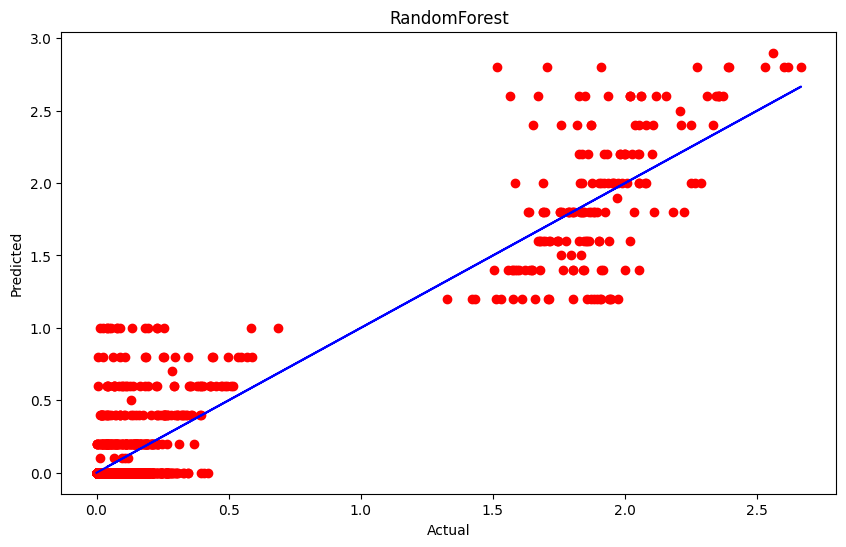

In [127]:
plt.figure(figsize=(10,6))
plt.scatter(x=RFRpred,y=y_test,color='r')
plt.plot(RFRpred,RFRpred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RandomForest')

**Hyperpatameter Tuning**

In [128]:
param = {'criterion':['squared_error', 'friedman_mse'],'n_estimators':[50,100,200],'max_features':['sqrt', 'log2', 'None'],'max_depth': [1, 3, 10,100], 'max_leaf_nodes': [2, 5, 10, 100]}
gscv = GridSearchCV(RandomForestRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [1, 3, 10, 100],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'max_leaf_nodes': [2, 5, 10, 100],
                         'n_estimators': [50, 100, 200]})

In [129]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 100,
 'max_features': 'log2',
 'max_leaf_nodes': 100,
 'n_estimators': 200}

In [130]:
model2 = RandomForestRegressor(criterion= 'squared_error', max_depth= 100, max_features= 'log2', max_leaf_nodes= 100, n_estimators= 200)
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
print('R2_score:', r2_score(y_test,pred2))
print('MAE:', mean_absolute_error(y_test, pred2))
print('MSE:', mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, pred2)))

R2_score: 0.8686794408720205
MAE: 0.12289622972476447
MSE: 0.040568479018913424
RMSE: 0.350565585482609


In [131]:
joblib.dump(model2,'rainfall.pk1')

['rainfall.pk1']

In [132]:
df2 = pd.DataFrame()
actual = np.array(y_test)
df2['Actual'] = actual
df2['Prediction'] = pred2
df2

,Actual,Prediction
0,0.0,0.029705
1,0.0,0.076185
2,0.0,0.052484
3,0.0,0.048831
4,0.0,0.090610
...,...,...
2040,0.0,0.072141
2041,2.6,2.107186
2042,0.4,0.087285
2043,0.2,0.063167
